In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Observed Data

In [2]:
with h5py.File("mass_data.h5",'r') as hf:
    mobs = np.array(hf['mobs'])
hf.close()

In [3]:
f1_true = 0.7
mu1_true = 34.0
sigma1_true = 3.0
mu2_true = 55.0
sigma2_true = 1.0
Nobs = 10000

In [4]:
from scipy.stats import norm
def pop(m, f1, mu1, sigma1, mu2, sigma2):
    return f1*norm(mu1, sigma1).pdf(m)+(1-f1)*norm(mu2, sigma2).pdf(m)

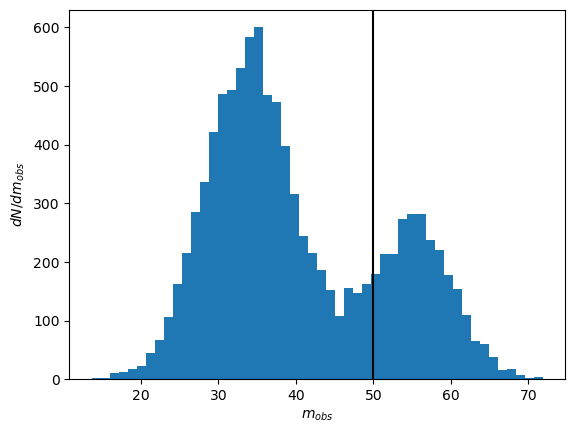

In [5]:
_ = plt.hist(mobs, bins=50)
plt.axvline(50, color='k')
plt.xlabel(r'$m_{obs}$')
plt.ylabel(r'$dN/dm_{obs}$')
plt.savefig('Obseved_pop.pdf');

# Higher Mass wo Normalization

In [6]:
with h5py.File("higher_mass_wo_norm.h5",'r') as hf:
    mu2 = np.array(hf['mu2'])
    sigma2 = np.array(hf['sigma2'])
hf.close()

In [7]:
marray = np.linspace(50, 60, 1000)
pop_wo_norm = []
for i in range(len(marray)):
    pop_wo_norm.append(norm(mu2, sigma2).pdf(marray[i]))
pop_wo_norm = np.array(pop_wo_norm)

In [8]:
pop_wo_norm.shape

(1000, 4000)

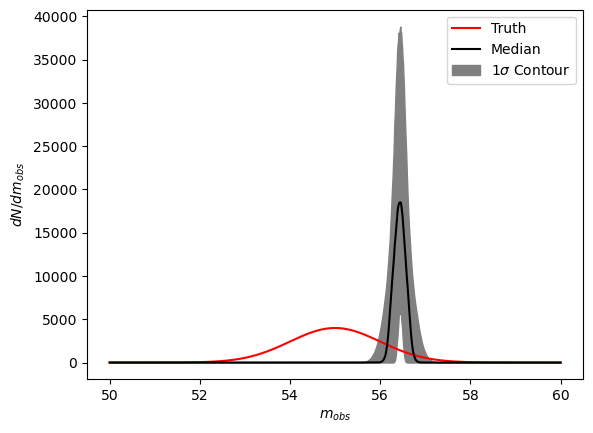

In [9]:
plt.plot(marray, Nobs*norm(mu2_true, sigma2_true).pdf(marray), color='Red', label="Truth")
plt.plot(marray, Nobs*np.median(pop_wo_norm, axis=1), color='black', label="Median")
plt.fill_between(marray, Nobs*np.quantile(pop_wo_norm, q=0.84, axis=1),
                 Nobs*np.quantile(pop_wo_norm, q=0.16, axis=1), color='grey', label=r"$1\sigma$ Contour")
plt.legend()
plt.xlabel(r'$m_{obs}$')
plt.ylabel(r'$dN/dm_{obs}$')
plt.savefig('wo_norm.pdf');

# Higher Mass with Normalization

In [10]:
with h5py.File("samples.h5",'r') as hf:
    mu2 = np.array(hf['mu2'])
    sigma2 = np.array(hf['sigma2'])
hf.close()

In [11]:
pop_w_norm = []
for i in range(len(marray)):
    pop_w_norm.append(norm(mu2, sigma2).pdf(marray[i]))
pop_w_norm = np.array(pop_w_norm)

In [12]:
pop_w_norm.shape

(1000, 4000)

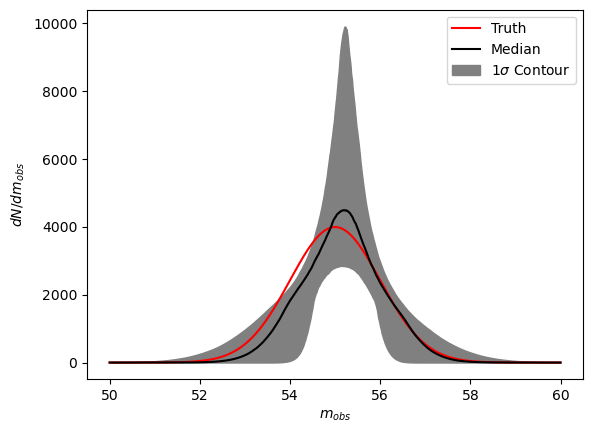

In [14]:
plt.plot(marray, Nobs*norm(mu2_true, sigma2_true).pdf(marray), color='Red', label="Truth")
plt.plot(marray, Nobs*np.median(pop_w_norm, axis=1), color='black', label="Median")
plt.fill_between(marray, Nobs*np.quantile(pop_w_norm, q=0.84, axis=1),
                 Nobs*np.quantile(pop_w_norm, q=0.16, axis=1), color='grey', label=r"$1\sigma$ Contour")
plt.legend()
plt.xlabel(r'$m_{obs}$')
plt.ylabel(r'$dN/dm_{obs}$')
plt.savefig('w_norm.pdf');